In [ ]:
#!pip install keras

In [1]:
#!pip install tensorflow

In [8]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings('ignore')

In [4]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


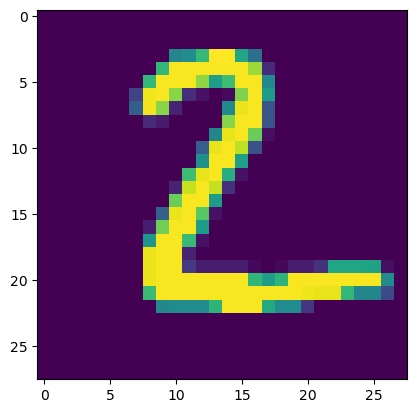

In [11]:
plt.imshow(x_test[1])

In [12]:
#### Pre_processing 
x_train= x_train.reshape(60000,784)
x_test= x_test.reshape(10000,784)
x_train.astype('float')
x_test.astype('float')
x_train= x_train/255
x_test= x_test/255

In [13]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
y_train[1]

np.uint8(0)

In [19]:
y_train= tf.keras.utils.to_categorical(y_train)
y_test= tf.keras.utils.to_categorical(y_test)

In [23]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [24]:
epochs=10
batch_size=1000
n_classes=10

#### Single layer network (Simple Perceptron)

In [25]:
simple_per= tf.keras.models.Sequential()

In [27]:
#### Model Building ( input layer ,output layer)
simple_per.add(tf.keras.layers.Dense(units=n_classes,activation='softmax',input_shape=[784]))

In [34]:
#### Model compilation
simple_per.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [30]:
#### Model Training and validation
history=simple_per.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6034 - loss: 1.4936 - val_accuracy: 0.8135 - val_loss: 0.9131
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8334 - loss: 0.7595 - val_accuracy: 0.8679 - val_loss: 0.6149
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8649 - loss: 0.5756 - val_accuracy: 0.8837 - val_loss: 0.5025
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8792 - loss: 0.4918 - val_accuracy: 0.8944 - val_loss: 0.4434
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8888 - loss: 0.4432 - val_accuracy: 0.9006 - val_loss: 0.4064
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8944 - loss: 0.4110 - val_accuracy: 0.9046 - val_loss: 0.3809
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8991 - loss: 0.3875 - val_accuracy: 0.9071 - val_loss: 0.3618
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9033 - loss: 0.3698 - val_accuracy: 0.9080 - va

In [32]:
val_loss,val_acc=simple_per.evaluate(x_test,y_test)
print('val_loss:',val_loss,',','val_acc:',val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9123 - loss: 0.3275  
val_loss: 0.3274505138397217 , val_acc: 0.9122999906539917


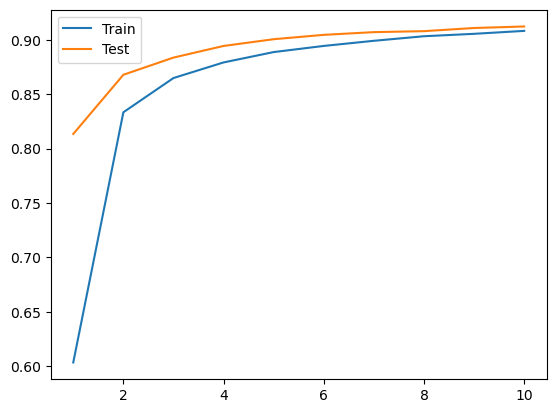

In [36]:
plt.plot(range(1,11),history.history['accuracy'],label=['Train'])
plt.plot(range(1,11) ,history.history['val_accuracy'],label=['Test'])
plt.legend()

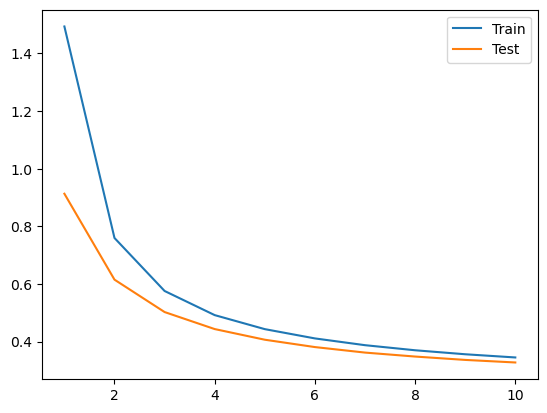

In [37]:
plt.plot(range(1,11),history.history['loss'],label=['Train'])
plt.plot(range(1,11) ,history.history['val_loss'],label=['Test'])
plt.legend()

#### Multi_layer_Network (ANN)

In [61]:
ann= tf.keras.models.Sequential()

In [62]:
784*2/3+10

532.6666666666666

In [63]:
#### Input layer,First hidden layer
ann.add(tf.keras.layers.Dense(units=540,activation='relu',input_shape=[784]))
ann.add(tf.keras.layers.Dropout(0.1))

In [64]:
540*2/3+10

370.0

In [65]:
#### Second hidden layer
ann.add(tf.keras.layers.Dense(units=370,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.1))

In [66]:
### output layers
ann.add(tf.keras.layers.Dense(units=n_classes,activation='softmax'))

In [67]:
#### Model compilation
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
#### Model Training and validation
history=ann.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.8649 - loss: 0.4849 - val_accuracy: 0.9457 - val_loss: 0.1882
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9503 - loss: 0.1698 - val_accuracy: 0.9627 - val_loss: 0.1252
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9668 - loss: 0.1134 - val_accuracy: 0.9712 - val_loss: 0.0923
Epoch 4/10
42/60 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9753 - loss: 0.0856

In [ ]:
val_loss,val_acc=ann.evaluate(x_test,y_test)
print('val_loss:',val_loss,',','val_acc:',val_acc)

In [ ]:
plt.plot(range(1,11),history.history['accuracy'],label=['Train'])
plt.plot(range(1,11) ,history.history['val_accuracy'],label=['Test'])
plt.legend()

In [ ]:
plt.plot(range(1,11),history.history['loss'],label=['Train'])
plt.plot(range(1,11) ,history.history['val_loss'],label=['Test'])
plt.legend()